In [1]:
import os
import numpy as np
import sklearn
import sklearn.linear_model
import sklearn.metrics
import sklearn.pipeline
import matplotlib
import matplotlib.pyplot as plt
from confusion_matrix import calc_confusion_matrix_for_probas_and_threshold
from show_images import show_images
from sklearn.neural_network import MLPClassifier
plt.style.use('seaborn') # pretty matplotlib plots
import seaborn as sns
sns.set('notebook', style='whitegrid', font_scale=1.25)



In [2]:
DATA_DIR = os.path.join('.', 'data_sneaker_vs_sandal')

x_all = np.loadtxt(os.path.join(DATA_DIR, 'x_train.csv'), delimiter=',', skiprows=1)
y_all = np.loadtxt(os.path.join(DATA_DIR, 'y_train.csv'), delimiter=',', skiprows=1)

A = x_all.shape[0]

x_tr = x_all[:8000]
y_tr = y_all[:8000]

x_va = x_all[8000:12000]
y_va = y_all[8000:12000]

In [3]:
# method 2 mlp
layer_sizes = [784]
max_iter_per_run = 4000
from sklearn.neural_network import MLPClassifier
pipeline = sklearn.pipeline.Pipeline([
    ("step1", sklearn.preprocessing.MinMaxScaler()),
    ("step2", MLPClassifier(
            hidden_layer_sizes=layer_sizes,
            activation='relu',
            alpha=0.0001,
            tol=1e-5,
            n_iter_no_change=50,
            max_iter=max_iter_per_run,
            solver='sgd',
            batch_size=100,
            learning_rate='adaptive', learning_rate_init=0.2, momentum=0.0,
            )),
    ])
pipeline.fit(x_tr,y_tr)
yproba_tr_mlp = pipeline.predict_proba(x_tr)[:,1]
yproba_va_mlp = pipeline.predict_proba(x_va)[:,1]
tr_log_loss_mlp = sklearn.metrics.log_loss(y_tr, yproba_tr_mlp)/np.log(2)
va_log_loss_mlp = sklearn.metrics.log_loss(y_va, yproba_va_mlp)/np.log(2)

In [4]:
print(calc_confusion_matrix_for_probas_and_threshold(y_va, yproba_va_mlp, 0.5))

Predicted     0     1
True                 
0          1955    33
1            43  1969


In [5]:
#baseline

i = 40
C = 10
lr = sklearn.linear_model.LogisticRegression(solver='lbfgs', C=C, max_iter=i).fit(x_tr, y_tr)
yproba_tr_ba = lr.predict_proba(x_tr)[:, 1]
yproba_va_ba = lr.predict_proba(x_va)[:, 1]
tr_bce_ba = sklearn.metrics.log_loss(y_tr, yproba_tr_ba)/np.log(2)
va_bce_ba = sklearn.metrics.log_loss(y_va, yproba_va_ba)/np.log(2)


/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
print(calc_confusion_matrix_for_probas_and_threshold(y_va, yproba_va_ba, 0.5))

Predicted     0     1
True                 
0          1909    79
1            87  1925


In [9]:
#method 1
pipeline = sklearn.pipeline.Pipeline([
    ("step1", sklearn.preprocessing.PolynomialFeatures(2,interaction_only = True)),
    ("step2", sklearn.linear_model.LogisticRegression(solver='lbfgs', C=1, max_iter=30)),
    ])
pipeline.fit(x_tr[0:4000], y_tr[0:4000])
yproba_tr_p = pipeline.predict_proba(x_tr)[:, 1]
yproba_va_p = pipeline.predict_proba(x_va)[:, 1]

tr_bce_p = sklearn.metrics.log_loss(y_va, yproba_va_p)/np.log(2)
va_bce_p = sklearn.metrics.log_loss(y_va, yproba_va_p)/np.log(2)


/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'calc_mean_binary_cross_entropy_from_probas' is not defined

In [10]:
print(calc_confusion_matrix_for_probas_and_threshold(y_va, yproba_va_p, 0.5))

Predicted     0     1
True                 
0          1954    34
1            71  1941


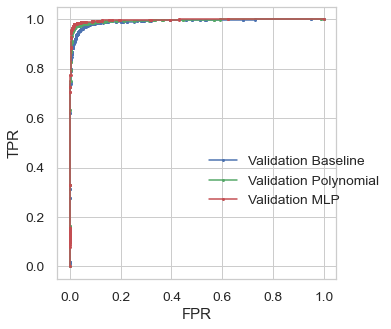

In [17]:
va_fpr_mlp, va_tpr_mlp, i1 = sklearn.metrics.roc_curve(y_va, yproba_va_mlp)
va_fpr_ba, va_tpr_ba, i2 = sklearn.metrics.roc_curve(y_va, yproba_va_ba)
va_fpr_p, va_tpr_p, i3 = sklearn.metrics.roc_curve(y_va, yproba_va_p)
plt.figure(figsize=(5,5));
plt.plot(va_fpr_ba, va_tpr_ba, 'b.-', label='Validation Baseline');
plt.plot(va_fpr_p, va_tpr_p, 'g.-', label='Validation Polynomial');
plt.plot(va_fpr_mlp, va_tpr_mlp, 'r.-', label='Validation MLP');
plt.xlabel('FPR');
plt.ylabel('TPR');
plt.legend(bbox_to_anchor=(0.5, 0.5));

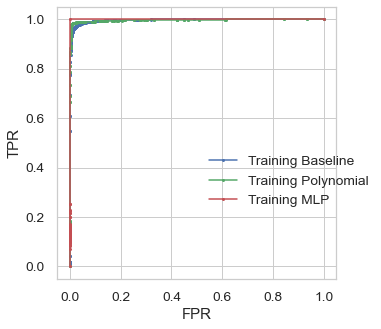

In [16]:
tr_fpr_mlp, tr_tpr_mlp, i1 = sklearn.metrics.roc_curve(y_tr, yproba_tr_mlp)
tr_fpr_ba, tr_tpr_ba, i2 = sklearn.metrics.roc_curve(y_tr, yproba_tr_ba)
tr_fpr_p, tr_tpr_p, i3 = sklearn.metrics.roc_curve(y_tr, yproba_tr_p)
plt.figure(figsize=(5,5));
plt.plot(tr_fpr_ba, tr_tpr_ba, 'b.-', label='Training Baseline');
plt.plot(tr_fpr_p, tr_tpr_p, 'g.-', label='Training Polynomial');
plt.plot(tr_fpr_mlp, tr_tpr_mlp, 'r.-', label='Training MLP');
plt.xlabel('FPR');
plt.ylabel('TPR');
plt.legend(bbox_to_anchor=(0.5, 0.5));

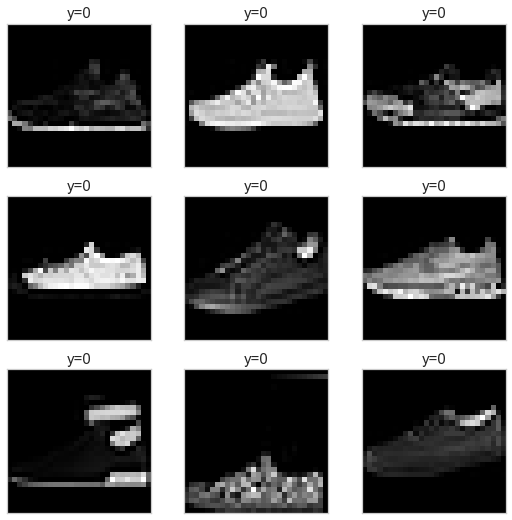

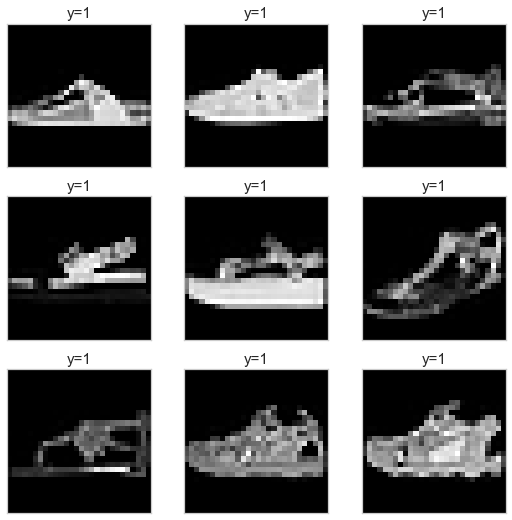

In [19]:
false_positive = []
false_negative = []
for i in range(4000):
    p = yproba_va_p[i]
    p = p>0.5
    if p == 1 and p != y_va[i]:
        false_positive.append(i)
    if p == 0 and p != y_va[i]:
        false_negative.append(i)

    
show_images(x_va,y_va,false_positive[0:9])
show_images(x_va,y_va,false_negative[0:9])